In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; 
sns.set(color_codes=True)

from sklearn.preprocessing import QuantileTransformer

In [2]:
store_visits = pd.read_csv('datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
252,514.388376,520.265364,0
315,506.330102,686.758539,0
289,571.775210,827.378976,0
309,505.119600,598.015303,0
318,477.315566,693.871766,0
209,569.027481,677.120627,0
183,710.619666,3603.098332,1
278,430.764617,657.623689,0
49,933.613902,4702.069511,1
67,1062.455868,5411.279340,1


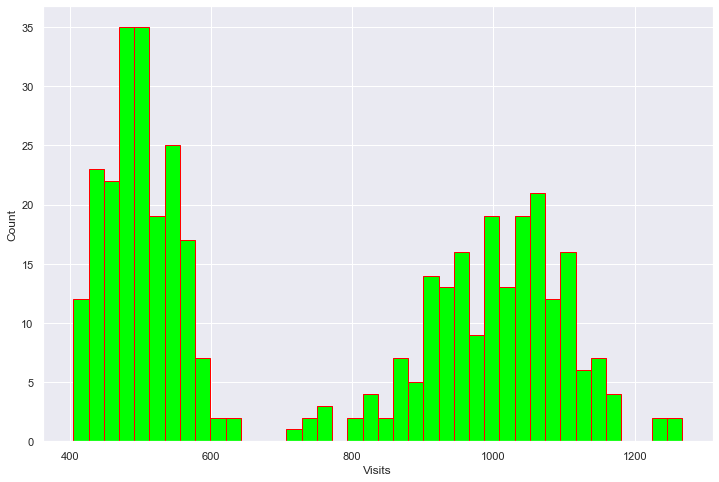

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Visits'], 
         facecolor='lime', 
         edgecolor='red', 
         bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

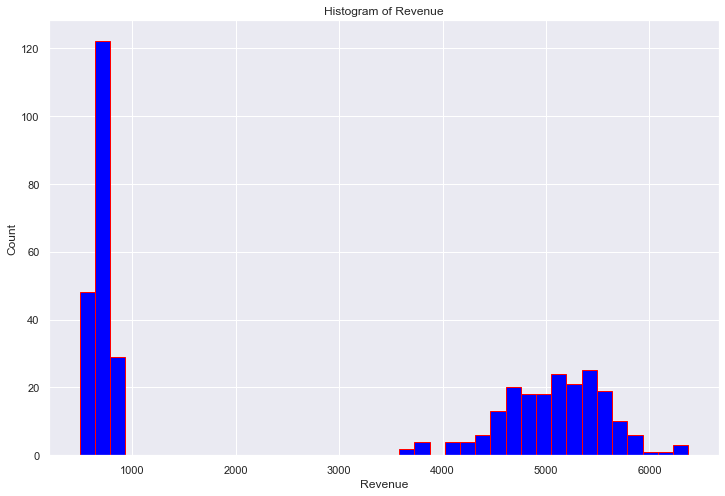

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Revenue'], 
         facecolor='blue', 
         edgecolor='red', 
         bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [6]:
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=200)

store_transform = transformer.fit_transform(store_visits[['Visits','Revenue']])

In [7]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.689662,0.733025
1,0.990498,0.989974
2,0.315277,0.334061
3,0.370619,0.426712
4,1.221233,1.245011


In [8]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.689662,0.733025
1,1058.607260,5349.036298,1,0.990498,0.989974
2,935.069490,4756.347453,1,0.315277,0.334061
3,952.360965,4849.804826,1,0.370619,0.426712
4,1078.384010,5467.920052,1,1.221233,1.245011


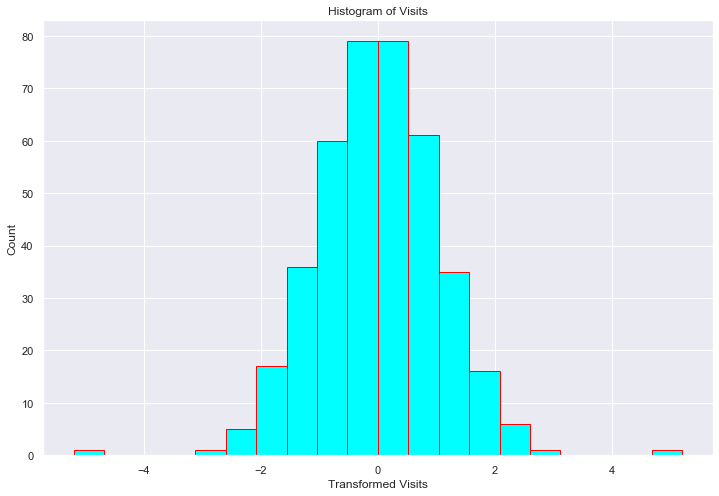

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Visits_transform'], 
         facecolor='cyan', 
         edgecolor='red', 
         bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

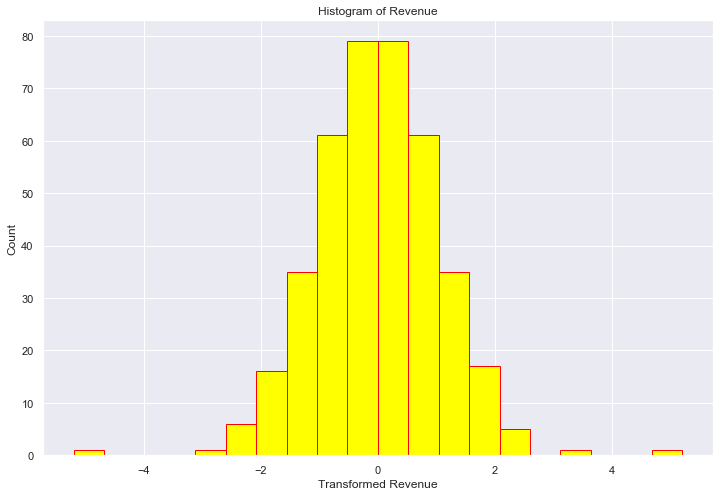

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Revenue_transform'], 
         facecolor='yellow', 
         edgecolor='red', 
         bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


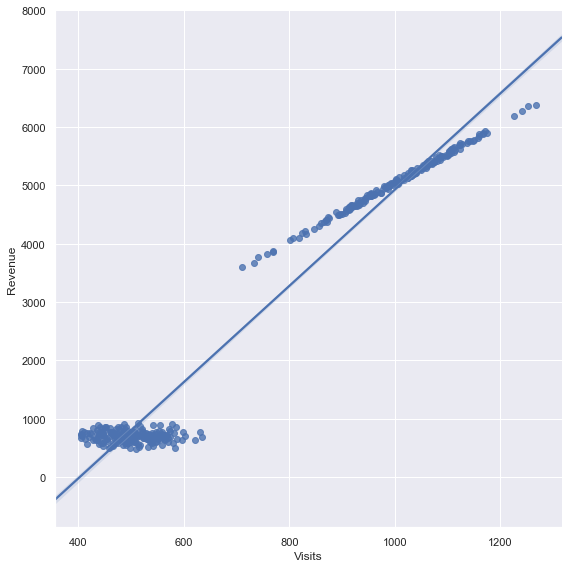

In [11]:
sns.lmplot(x="Visits", 
           y="Revenue", 
           data=final_df, 
           height=8)

plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


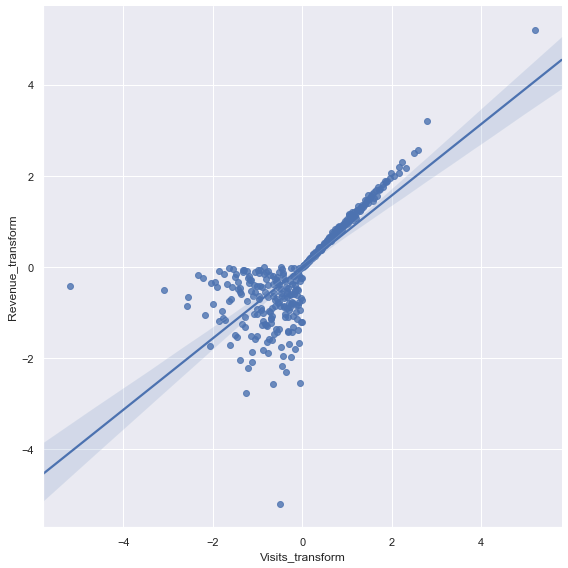

In [12]:
g = sns.lmplot(x="Visits_transform", 
               y="Revenue_transform", 
               data=final_df, 
               height=8)

plt.show()